In [1]:
import numpy as np # for mathematical caluclations
import pandas as pd 
from datetime import datetime  # to access datetime
import scipy.stats as stats

# for data visualization
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px # for interactive plotting
import plotly.graph_objects as go # for interactive plotting

# set the plot style in matplotlib to ggplot and the firgure size to 15x5## Augmented Dickey Fuller Test for Assessing Stationarity
plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = (15,5)

# for ingnoring warnings
import warnings # to ignore warning
warnings.filterwarnings('ignore')

In [2]:
#to show all columns
pd.set_option('display.max_columns', None)

In [4]:
player_data=pd.read_excel('NBA Per Game Cleaned Stats.xlsx')

In [5]:
player_data.head()

,Rk,Player-additional,Player,Pos,Age,Tm,G,GS,MPG,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS48,OBPM,DBPM,BPM,VORP
0,1,achiupr01,Precious Achiuwa,C,23,TOR,55,12,20.7,3.6,7.3,0.485,0.5,2.0,0.269,3.0,5.4,0.564,0.521,1.6,2.3,0.702,1.8,4.1,6.0,0.9,0.6,0.5,1.1,1.9,9.2,1140,15.2,0.554,0.267,0.307,9.3,24.4,16.3,6.3,1.3,2.6,11.4,19.4,0.8,1.4,2.2,0.093,-1.4,-0.8,-2.3,-0.1
1,2,adamsst01,Steven Adams,C,29,MEM,42,42,27.0,3.7,6.3,0.597,0.0,0.0,0.000,3.7,6.2,0.599,0.597,1.1,3.1,0.364,5.1,6.5,11.5,2.3,0.9,1.1,1.9,2.3,8.6,1133,17.5,0.564,0.004,0.490,20.1,25.3,22.7,11.2,1.5,3.7,19.8,14.6,1.3,2.1,3.4,0.144,-0.3,0.9,0.6,0.7
2,3,adebaba01,Bam Adebayo,C,25,MIA,75,75,34.6,8.0,14.9,0.540,0.0,0.2,0.083,8.0,14.7,0.545,0.541,4.3,5.4,0.806,2.5,6.7,9.2,3.2,1.2,0.8,2.5,2.8,20.4,2598,20.1,0.592,0.011,0.361,8.0,23.6,15.5,15.9,1.7,2.4,12.7,25.2,3.6,3.8,7.4,0.137,0.8,0.8,1.5,2.3
3,4,agbajoc01,Ochai Agbaji,SG,22,UTA,59,22,20.5,2.8,6.5,0.427,1.4,3.9,0.355,1.4,2.7,0.532,0.532,0.9,1.2,0.812,0.7,1.3,2.1,1.1,0.3,0.3,0.7,1.7,7.9,1209,9.5,0.561,0.591,0.179,3.9,6.9,5.4,7.5,0.6,1.0,9.0,15.8,0.9,0.4,1.3,0.053,-1.7,-1.4,-3.0,-0.3
4,5,aldamsa01,Santi Aldama,PF,22,MEM,77,20,21.8,3.2,6.8,0.470,1.2,3.5,0.353,2.0,3.4,0.591,0.560,1.4,1.9,0.750,1.1,3.7,4.8,1.3,0.6,0.6,0.8,1.9,9.0,1682,13.9,0.591,0.507,0.274,5.4,18.0,11.7,7.6,1.3,2.6,9.3,16.0,2.1,2.4,4.6,0.130,-0.3,0.8,0.5,1.1


In [5]:
player_data.columns

Index(['Rk', 'Player-additional', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS',
       'MPG', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%',
       'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK',
       'TOV', 'PF', 'PTS', 'MP', 'PER', 'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%',
       'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 'OWS', 'DWS', 'WS',
       'WS48', 'OBPM', 'DBPM', 'BPM', 'VORP'],
      dtype='object')

In [6]:
#checn null data
player_data[player_data.isna().any(axis=1)]

,Rk,Player-additional,Player,Pos,Age,Tm,G,GS,MPG,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS48,OBPM,DBPM,BPM,VORP
14,15,arcidry01,Ryan Arcidiacono,PG,28,POR,20,4,8.6,0.5,1.9,0.243,0.4,1.2,0.348,0.1,0.7,0.071,0.351,0.0,0.0,NaN,0.0,0.8,0.8,1.2,0.3,0.0,0.4,0.9,1.3,172,2.7,0.351,0.622,0.000,0.0,10.0,5.0,16.9,1.4,0.0,15.9,11.1,-0.2,0.1,-0.2,-0.043,-7.3,-1.5,-8.8,-0.3
17,18,azubuud01,Udoka Azubuike,C,23,UTA,36,4,10.0,1.6,2.0,0.819,0.0,0.0,NaN,1.6,2.0,0.819,0.819,0.2,0.6,0.350,0.9,2.4,3.3,0.3,0.2,0.4,0.5,0.9,3.5,359,16.1,0.774,0.000,0.278,9.5,26.1,17.9,4.3,0.8,3.5,18.2,11.5,0.6,0.4,1.0,0.134,-1.2,0.5,-0.6,0.1
42,43,biyombi01,Bismack Biyombo,C,30,PHO,61,14,14.3,2.0,3.4,0.578,0.0,0.0,NaN,2.0,3.4,0.578,0.578,0.4,1.1,0.357,1.5,2.8,4.3,0.9,0.3,1.4,0.8,1.9,4.3,874,14.4,0.555,0.000,0.340,11.0,22.1,16.5,8.7,1.0,9.0,17.7,14.0,0.2,1.6,1.9,0.102,-3.4,2.5,-0.9,0.2
47,48,bolmale01,Leandro Bolmaro,SF,22,UTA,14,0,4.9,0.2,1.4,0.150,0.0,0.3,0.000,0.2,1.1,0.188,0.150,0.0,0.0,NaN,0.3,0.2,0.5,0.5,0.2,0.1,0.5,0.7,0.4,68,-5.0,0.150,0.200,0.000,6.5,4.7,5.6,12.3,2.1,1.2,25.9,16.6,-0.4,0.0,-0.3,-0.231,-12.4,-2.3,-14.7,-0.2
65,66,brownmo01,Moses Brown,C,23,BRK,36,1,8.2,1.7,2.7,0.635,0.0,0.0,NaN,1.7,2.7,0.635,0.635,0.9,2.0,0.458,1.6,2.3,3.9,0.1,0.1,0.4,0.4,1.1,4.3,294,22.2,0.607,0.000,0.750,22.0,30.9,26.5,2.1,0.7,4.2,10.5,21.2,0.7,0.4,1.1,0.179,0.6,-1.2,-0.6,0.1
66,67,brownst02,Sterling Brown,SF,27,LAL,4,0,6.0,0.0,1.0,0.000,0.0,0.5,0.000,0.0,0.5,0.000,0.000,0.0,0.0,NaN,0.8,1.3,2.0,0.5,0.8,0.0,0.0,1.0,0.0,24,7.0,0.000,0.500,0.000,13.9,21.6,17.8,9.4,5.9,0.0,0.0,7.0,0.0,0.1,0.0,0.040,-7.7,4.3,-3.3,0.0
72,73,burtode02,Deonte Burton,PF,29,SAC,2,0,3.0,0.0,1.0,0.000,0.0,0.5,0.000,0.0,0.5,0.000,0.000,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6,-12.6,0.000,0.500,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.3,0.0,0.0,0.0,-0.347,-13.9,-10.4,-24.2,0.0
73,74,butleja02,Jared Butler,PG,22,OKC,6,1,12.8,2.5,5.3,0.469,1.2,2.3,0.500,1.3,3.0,0.444,0.578,0.0,0.0,NaN,0.2,0.5,0.7,1.3,0.8,0.0,0.8,0.8,6.2,77,13.0,0.578,0.438,0.000,1.4,4.3,2.8,15.0,3.1,0.0,13.5,20.1,0.0,0.1,0.1,0.061,-2.2,-0.4,-2.6,0.0
81,82,careyve01,Vernon Carey Jr.,C,21,WAS,11,0,2.5,0.2,0.7,0.250,0.0,0.0,NaN,0.2,0.7,0.250,0.250,0.2,0.2,1.000,0.3,0.7,1.0,0.3,0.2,0.2,0.2,0.5,0.5,28,10.8,0.338,0.000,0.250,12.4,30.6,21.8,13.3,3.5,6.0,18.4,16.9,-0.1,0.1,0.0,0.014,-7.1,2.1,-5.0,0.0
87,88,champju01,Justin Champagnie,SF,21,BOS,5,0,6.8,1.0,3.0,0.333,0.2,1.0,0.200,0.8,2.0,0.400,0.367,0.0,0.0,NaN,0.6,1.0,1.6,0.8,0.2,0.0,0.0,0.4,2.2,34,10.3,0.367,0.333,0.000,9.6,17.1,13.1,16.3,1.4,0.0,0.0,19.2,0.0,0.0,0.0,0.009,-5.1,-2.8,-7.9,-0.1


In [7]:
#the data is null because they registered 0 in those metrics. Thus, we can change the null to 0.
player_data.fillna(0,inplace=True)

In [8]:
player_data.describe()

,Rk,Age,G,GS,MPG,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS48,OBPM,DBPM,BPM,VORP
count,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000
mean,270.000000,25.727273,48.040816,22.820037,19.796846,3.348980,7.104638,0.463258,0.990538,2.782560,0.315306,2.359555,4.322820,0.529896,0.531881,1.434694,1.856957,0.719918,0.866234,2.676623,3.543043,2.068831,0.609647,0.382375,1.103711,1.688126,9.121336,1103.593692,13.322635,0.560590,0.400312,0.250169,5.220594,14.930056,10.072542,13.479221,1.523562,1.828200,12.570501,18.493692,1.214471,1.119295,2.334137,0.081698,-1.318182,-0.102412,-1.420965,0.550278
std,155.740168,4.290326,24.650686,27.295285,9.544958,2.436261,4.956779,0.109669,0.872442,2.244579,0.137108,1.972402,3.514788,0.140292,0.106176,1.545867,1.880798,0.212791,0.747543,1.773140,2.347046,1.933079,0.398533,0.384414,0.826909,0.792206,6.842216,827.778918,6.108055,0.103034,0.219802,0.182288,4.272294,6.545425,4.695401,8.695977,1.300622,2.424577,6.938045,5.863766,1.793621,0.994314,2.579326,0.085737,3.503663,2.150632,4.764528,1.219077
min,1.000000,19.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-20.900000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.900000,0.000000,-1.600000,-0.517000,-22.500000,-10.400000,-26.500000,-1.300000
25%,135.500000,23.000000,30.500000,1.000000,12.450000,1.600000,3.400000,0.416500,0.300000,1.000000,0.281000,0.900000,1.850000,0.485000,0.494500,0.500000,0.600000,0.667000,0.300000,1.400000,1.800000,0.800000,0.300000,0.100000,0.500000,1.200000,4.150000,329.000000,10.200000,0.523500,0.260000,0.143000,2.100000,10.700000,6.750000,7.400000,1.000000,0.700000,9.400000,14.400000,0.000000,0.300000,0.300000,0.046000,-2.900000,-0.900000,-3.300000,-0.100000
50%,270.000000,25.000000,54.000000,8.000000,19.200000,2.700000,5.800000,0.455000,0.800000,2.400000,0.342000,1.700000,3.200000,0.536000,0.538000,0.900000,1.200000,0.763000,0.700000,2.300000,3.000000,1.400000,0.600000,0.300000,0.900000,1.600000,7.000000,970.000000,13.000000,0.567000,0.408000,0.228000,3.900000,13.500000,8.900000,11.100000,1.400000,1.200000,11.800000,17.700000,0.600000,0.900000,1.600000,0.087000,-1.300000,-0.100000,-1.300000,0.100000
75%,404.500000,28.500000,68.000000,46.500000,28.350000,4.500000,9.450000,0.506000,1.500000,4.100000,0.385000,3.300000,6.000000,0.594000,0.576000,1.850000,2.400000,0.840000,1.100000,3.500000,4.500000,2.750000,0.800000,0.500000,1.500000,2.200000,12.100000,1846.000000,16.350000,0.609000,0.546500,0.323000,7.050000,18.600000,12.550000,17.700000,1.700000,2.400000,15.000000,21.200000,1.800000,1.800000,3.500000,0.129500,0.450000,0.750000,0.600000,0.800000
max,539.000000,42.000000,83.000000,83.000000,41.000000,11.200000,22.200000,1.000000,4.900000,11.400000,1.000000,10.500000,17.800000,1.000000,1.000000,10.000000,12.300000,1.000000,5.100000,9.600000,12.500000,10.700000,3.000000,3.000000,4.100000,5.000000,33.100000,2963.000000,65.600000,1.064000,1.000000,2.000000,28.800000,55.400000,29.600000,47.600000,24.200000,44.100000,100.000000,52.500000,11.200000,4.800000,14.900000,0.626000,17.000000,32.700000,48.600000,8.800000


In [9]:
a=list(range(0,90,10))
a.append(82)
a

[0, 10, 20, 30, 40, 50, 60, 70, 80, 82]

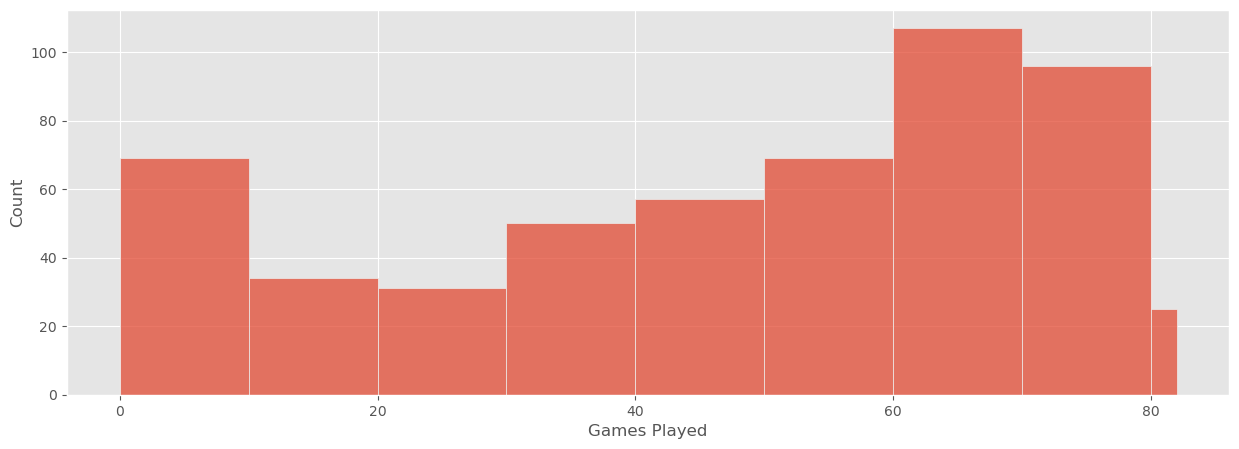

In [10]:
#check number of games played
sns.histplot(data=player_data, x='G',bins=a)
plt.xlabel('Games Played')
plt.ylabel('Count')
plt.show()

In [11]:
b=list(range(0,3000,100))

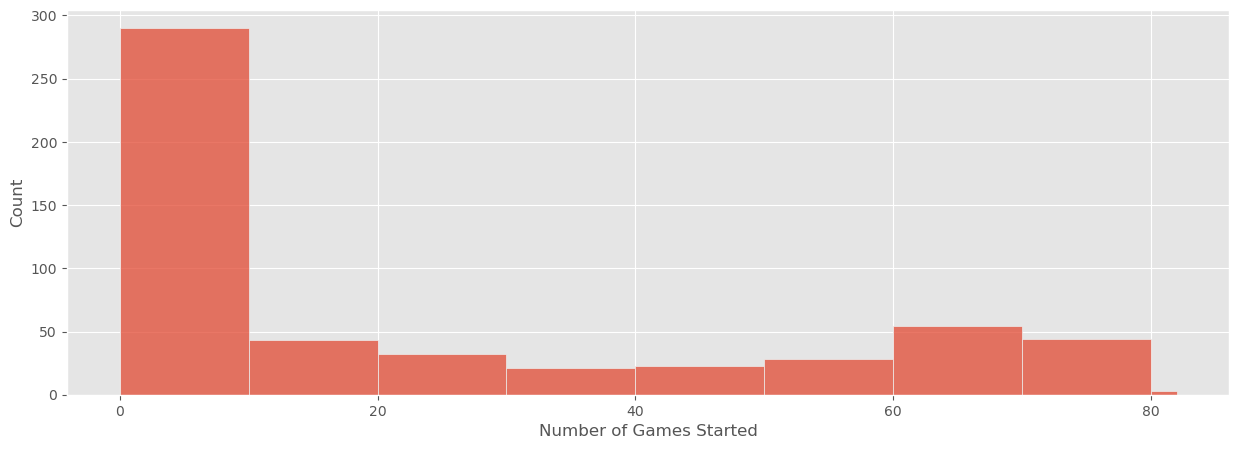

In [12]:
#check number of games started
sns.histplot(data=player_data, x='GS',bins=a)
plt.xlabel('Number of Games Started')
plt.ylabel('Count')
plt.show()

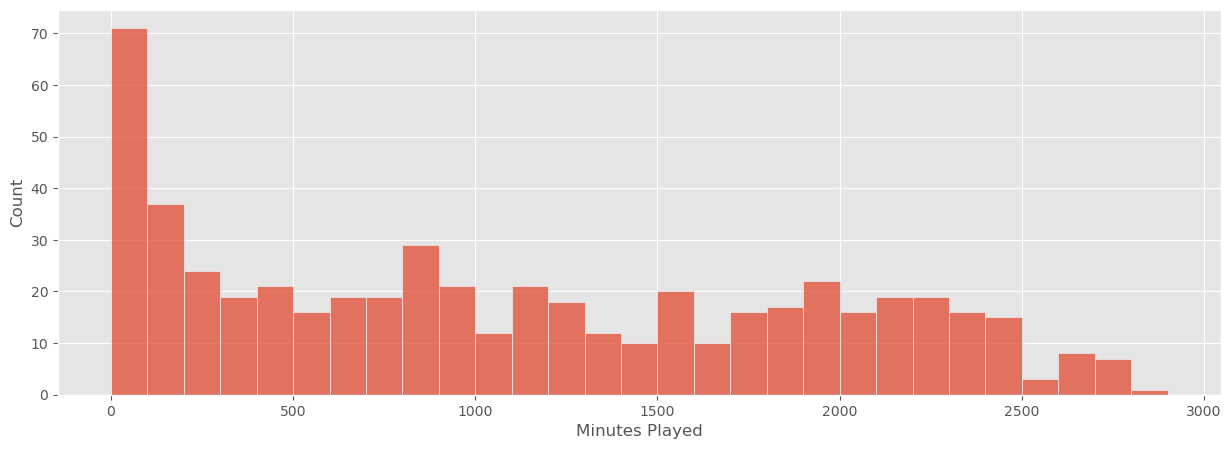

In [13]:
#check number of minutes played
sns.histplot(data=player_data, x='MP',bins=b)
plt.xlabel('Minutes Played')
plt.ylabel('Count')
plt.show()

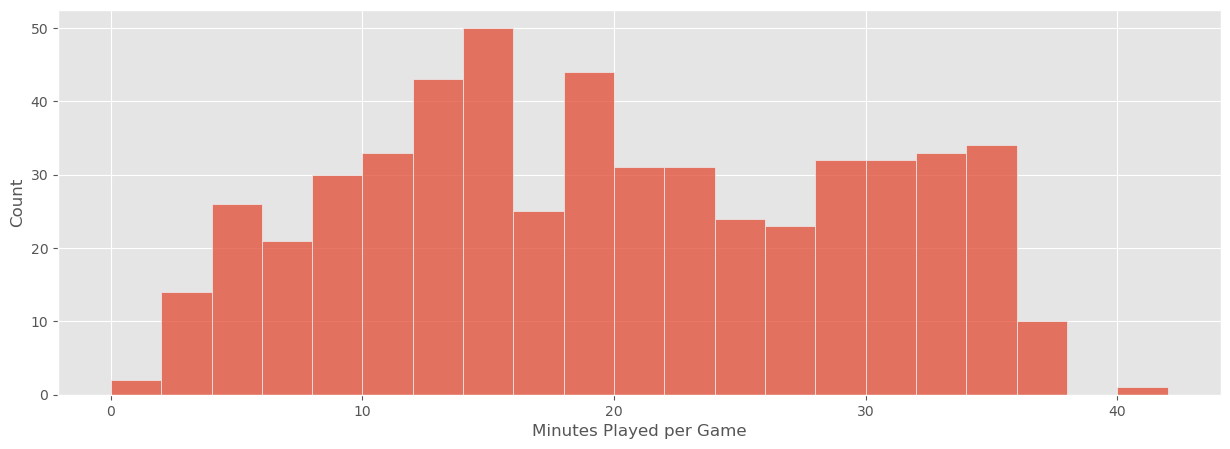

In [14]:
#check number of minutes played per game
sns.histplot(data=player_data, x='MPG',bins=list(range(0,44,2)))
plt.xlabel('Minutes Played per Game')
plt.ylabel('Count')
plt.show()

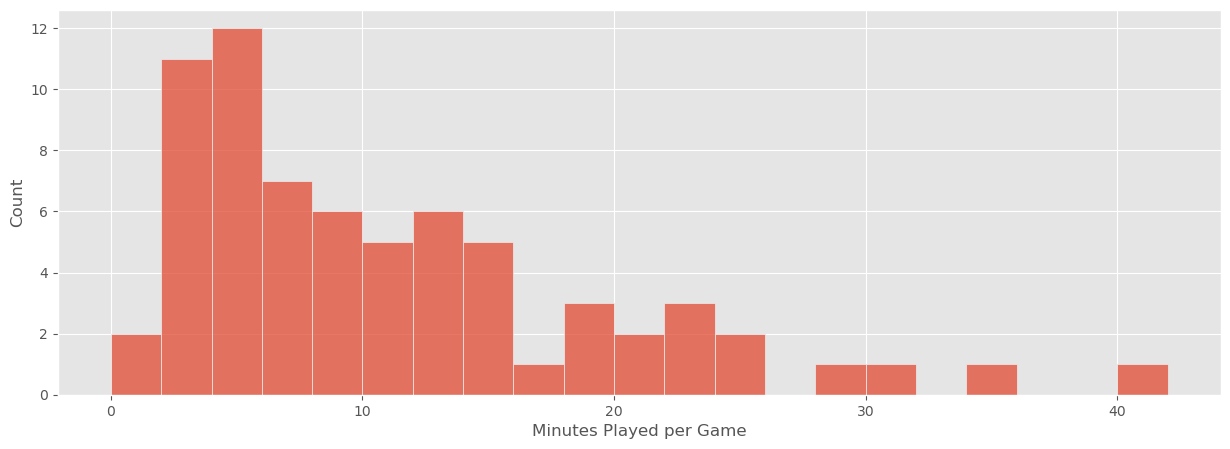

In [15]:
#number of games played under 10 games
sns.histplot(data=player_data[player_data['G'] < 10], x='MPG',bins=list(range(0,44,2)))
plt.xlabel('Minutes Played per Game')
plt.ylabel('Count')
plt.show()

In [16]:
pd.set_option('display.max_rows', None)
player_data[['Player','G','GS','MP','MPG','PTS','TRB','AST','BPM']][player_data['G'] < 10].sort_values(by=['BPM'],ascending=False)

,Player,G,GS,MP,MPG,PTS,TRB,AST,BPM
481,Stanley Umude,1,0,2,2.0,2.0,0.0,0.0,48.6
125,Tyler Dorsey,3,0,8,2.7,3.0,0.7,0.0,17.8
431,Jordan Schakel,2,0,6,3.0,1.5,0.0,0.5,17.0
527,Dylan Windler,3,0,10,3.3,1.7,0.0,0.3,6.7
222,Jay Huff,7,0,95,13.6,7.3,3.0,1.4,4.0
55,Jarrell Brantley,4,0,39,9.8,5.5,1.5,0.8,3.5
393,Micah Potter,7,0,52,7.4,3.4,2.3,0.6,3.5
113,Darius Days,4,0,25,6.3,3.8,1.5,0.3,3.5
265,Braxton Key,3,0,9,3.0,1.3,0.3,0.0,2.9
211,Malcolm Hill,5,0,9,1.8,1.0,0.6,0.0,2.4


In [17]:
pd.set_option('display.max_rows', None)
player_data[['Player','G','GS','MP','MPG','PTS','TRB','AST','BPM']][player_data['G'] < 10].describe().T

,count,mean,std,min,25%,50%,75%,max
G,69.0,4.913043,2.524813,1.0,3.0,5.0,7.0,9.0
GS,69.0,0.362319,1.042776,0.0,0.0,0.0,0.0,6.0
MP,69.0,54.217391,45.087780,1.0,20.0,41.0,83.0,189.0
MPG,69.0,11.128986,8.579389,1.0,5.0,9.0,15.0,41.0
PTS,69.0,4.108696,3.954771,0.0,1.5,3.0,5.5,20.0
TRB,69.0,1.826087,1.552858,0.0,0.7,1.5,2.6,9.0
AST,69.0,1.223188,1.731384,0.0,0.2,0.7,1.3,8.3
BPM,69.0,-4.144928,10.175454,-26.5,-8.4,-3.9,-0.3,48.6


In [18]:
pd.set_option('display.max_rows', None)
player_data[['Player','G','GS','MP','MPG','PTS','TRB','AST','BPM']][player_data['G'] >= 10].describe().T

,count,mean,std,min,25%,50%,75%,max
G,470.0,54.372340,19.552774,10.0,40.000,59.00,70.000,83.0
GS,470.0,26.117021,27.737905,0.0,2.000,12.00,54.000,83.0
MP,470.0,1257.651064,774.558176,28.0,573.250,1189.00,1946.500,2963.0
MPG,470.0,21.069362,9.008972,2.5,13.825,20.20,29.075,37.4
PTS,470.0,9.857234,6.869973,0.4,4.800,7.95,12.975,33.1
TRB,470.0,3.795106,2.339245,0.4,2.100,3.30,4.800,12.5
AST,470.0,2.192979,1.931650,0.1,0.900,1.40,2.900,10.7
BPM,470.0,-1.021064,3.126727,-15.0,-2.900,-1.10,0.600,13.0


In [19]:
player_data[['G','GS','MP','MPG']].describe().T

,count,mean,std,min,25%,50%,75%,max
G,539.0,48.040816,24.650686,1.0,30.50,54.0,68.00,83.0
GS,539.0,22.820037,27.295285,0.0,1.00,8.0,46.50,83.0
MP,539.0,1103.593692,827.778918,1.0,329.00,970.0,1846.00,2963.0
MPG,539.0,19.796846,9.544958,1.0,12.45,19.2,28.35,41.0


<Axes: >

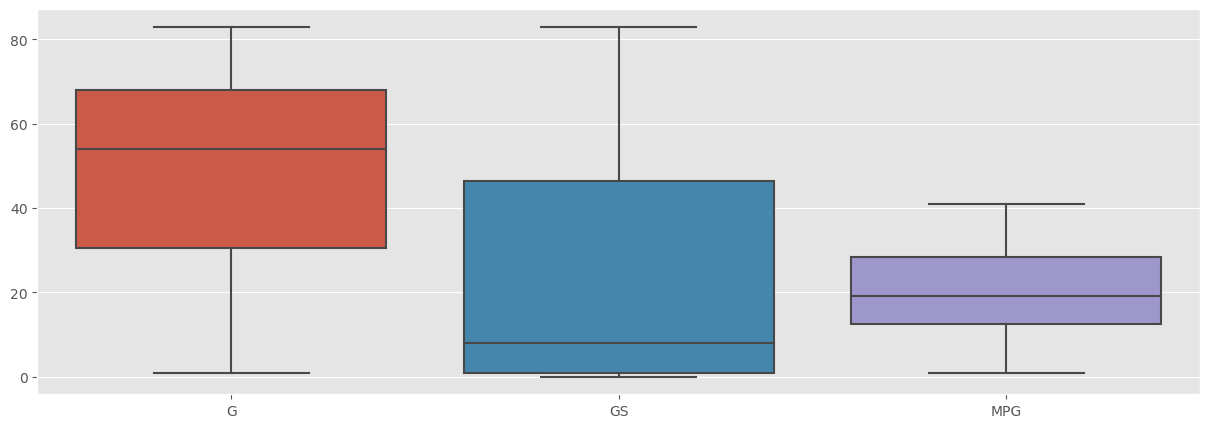

In [20]:
sns.boxplot(data=player_data[['G','GS','MPG']])

<Axes: >

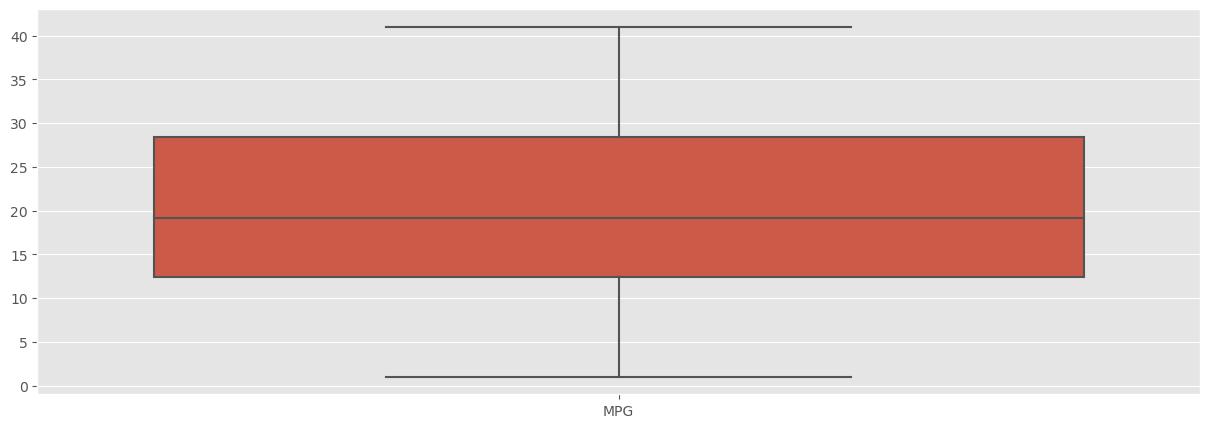

In [21]:
sns.boxplot(data=player_data[['MPG']])

In [22]:
pd.qcut(x=player_data['MPG'],q=20).value_counts().sort_index()

MPG
(0.999, 5.29]     27
(5.29, 7.08]      27
(7.08, 9.0]       29
(9.0, 10.9]       26
(10.9, 12.45]     26
(12.45, 13.64]    27
(13.64, 14.63]    27
(14.63, 15.72]    27
(15.72, 17.81]    27
(17.81, 19.2]     27
(19.2, 20.3]      27
(20.3, 22.28]     26
(22.28, 23.97]    27
(23.97, 26.0]     28
(26.0, 28.35]     26
(28.35, 30.04]    27
(30.04, 31.7]     29
(31.7, 33.4]      26
(33.4, 35.0]      28
(35.0, 41.0]      25
Name: count, dtype: int64

In [23]:
pd.qcut(x=player_data['GS'],q=4).value_counts().sort_index()

GS
(-0.001, 1.0]    171
(1.0, 8.0]       108
(8.0, 46.5]      125
(46.5, 83.0]     135
Name: count, dtype: int64

In [24]:
player_data.columns

Index(['Rk', 'Player-additional', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS',
       'MPG', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%',
       'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK',
       'TOV', 'PF', 'PTS', 'MP', 'PER', 'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%',
       'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 'OWS', 'DWS', 'WS',
       'WS48', 'OBPM', 'DBPM', 'BPM', 'VORP'],
      dtype='object')

In [25]:
#insert team rankings
team_data=pd.read_excel('team_rankings.xlsx')
team_data.head()

,Rk,Team,Team_abv,Win,Lose,win_perc,Home,Road,E,W,A,C,SE,NW,P,SW,Pre,Post,â‰¤3,â‰¥10,Oct,Nov,Dec,Jan,Feb,Mar,Apr
0,1,Milwaukee Bucks,MIL,58,24,0.707317,32-9,26-15,35-17,23-7,12-6,11-5,12-6,9-1,8-2,6-4,41-17,17-7,6-1,30-15,6-0,9-5,8-7,11-5,10-0,11-5,3-2
1,2,Boston Celtics,BOS,57,25,0.695122,32-9,25-16,34-18,23-7,11-5,11-7,12-6,7-3,7-3,9-1,42-17,15-8,5-8,31-11,4-2,14-2,8-6,10-5,8-3,10-6,3-1
2,3,Philadelphia 76ers,PHI,54,28,0.658537,29-12,25-16,34-18,20-10,10-6,13-5,11-7,7-3,8-2,5-5,38-19,16-9,10-5,26-11,4-4,8-6,9-4,11-3,7-4,12-5,3-2
3,4,Denver Nuggets,DEN,53,29,0.646341,34-7,19-22,19-11,34-18,4-6,7-3,8-2,10-6,13-5,11-7,41-18,12-11,7-6,29-15,4-3,10-4,9-5,12-4,9-3,7-7,2-3
4,5,Cleveland Cavaliers,CLE,51,31,0.621951,31-10,20-21,34-18,17-13,8-10,13-3,13-5,4-6,5-5,8-2,38-23,13-8,5-8,33-11,5-1,9-7,9-6,8-8,8-3,9-5,3-1


In [26]:
#merge with team
player_data2=player_data.merge(team_data[['Team_abv','win_perc']],left_on='Tm',right_on='Team_abv')
player_data2.describe().T

,count,mean,std,min,25%,50%,75%,max
Rk,539.0,270.000000,155.740168,1.000000,135.500000,270.000000,404.500000,539.000000
Age,539.0,25.727273,4.290326,19.000000,23.000000,25.000000,28.500000,42.000000
G,539.0,48.040816,24.650686,1.000000,30.500000,54.000000,68.000000,83.000000
GS,539.0,22.820037,27.295285,0.000000,1.000000,8.000000,46.500000,83.000000
MPG,539.0,19.796846,9.544958,1.000000,12.450000,19.200000,28.350000,41.000000
FG,539.0,3.348980,2.436261,0.000000,1.600000,2.700000,4.500000,11.200000
FGA,539.0,7.104638,4.956779,0.000000,3.400000,5.800000,9.450000,22.200000
FG%,539.0,0.463258,0.109669,0.000000,0.416500,0.455000,0.506000,1.000000
3P,539.0,0.990538,0.872442,0.000000,0.300000,0.800000,1.500000,4.900000
3PA,539.0,2.782560,2.244579,0.000000,1.000000,2.400000,4.100000,11.400000


In [27]:
included=['FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%',
       'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK',
       'TOV', 'PF', 'PTS','PER', 'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%',
       'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 'OWS', 'DWS',
       'WS48', 'OBPM', 'DBPM', 'BPM', 'VORP','win_perc','WS']

<Axes: >

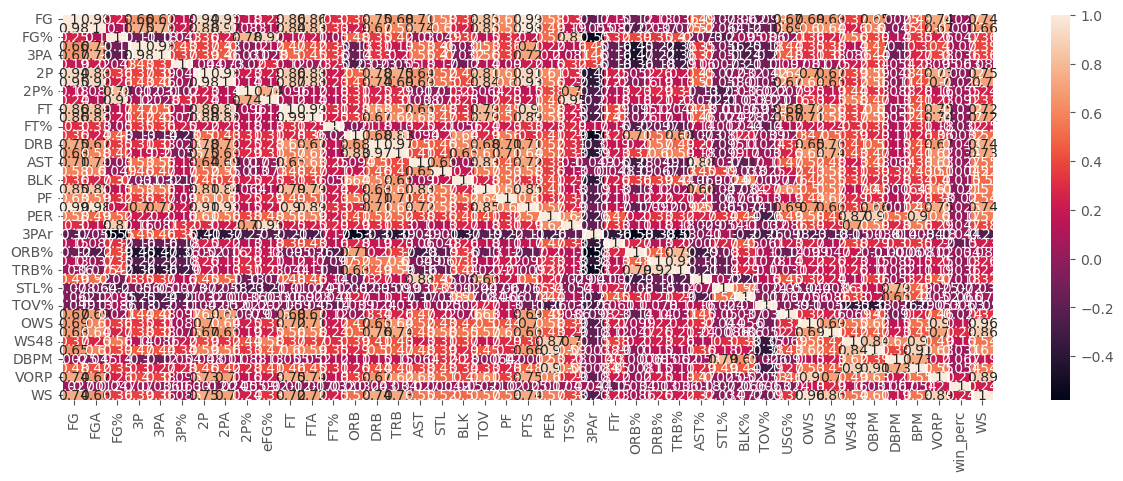

In [28]:
cor_matrix = player_data2[included].corr(numeric_only=True)
sns.heatmap(cor_matrix,
annot = True)

In [29]:
cor_matrix[cor_matrix['WS']>0.5]['WS'].sort_values(ascending=False)

WS      1.000000
OWS     0.960275
VORP    0.894939
DWS     0.864079
2P      0.745269
DRB     0.744445
FG      0.742585
PTS     0.740545
TRB     0.728437
FT      0.716645
FTA     0.715117
2PA     0.698531
FGA     0.660448
OBPM    0.614546
PER     0.572956
TOV     0.566991
AST     0.546214
PF      0.542576
WS48    0.541636
BPM     0.538765
STL     0.523190
ORB     0.521340
BLK     0.502874
Name: WS, dtype: float64

In [30]:
included2=['PER', 'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%',
       'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 'OWS', 'DWS',
       'WS48', 'OBPM', 'DBPM', 'BPM', 'VORP','win_perc','WS']

Text(0.5, 1.0, 'Advanced')

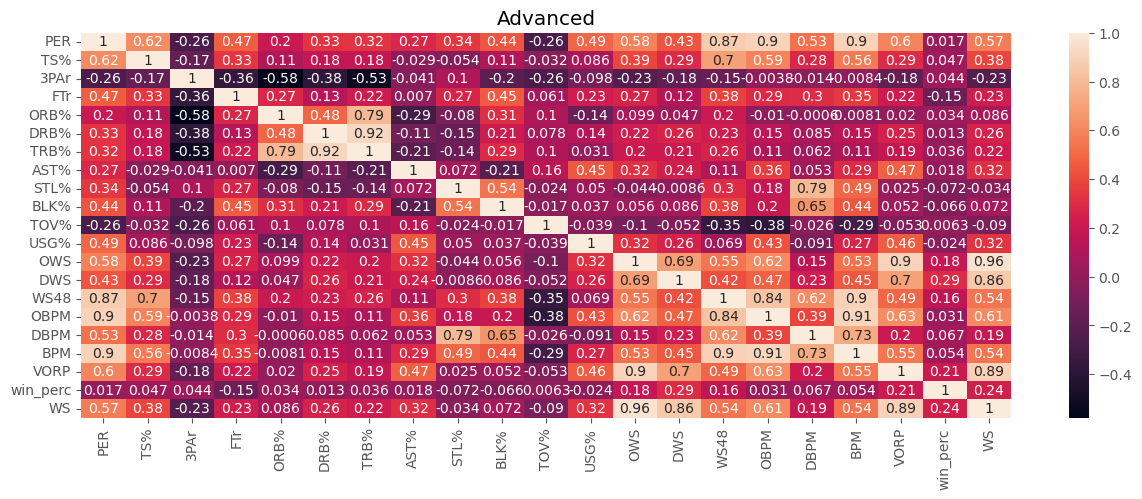

In [31]:
cor_matrix = player_data2[included2].corr(numeric_only=True)
sns.heatmap(cor_matrix,
annot = True)
plt.title('Advanced')

In [32]:
player_data2[player_data2['Tm']=='LAC'][['Player','WS']].sort_values(by='WS',ascending=False)

,Player,WS
356,Mason Plumlee,7.9
352,Kawhi Leonard,7.1
361,Ivica Zubac,6.7
349,Paul George,4.6
353,Terance Mann,4.3
344,Nicolas Batum,3.6
357,Norman Powell,3.5
350,Eric Gordon,2.3
355,Marcus Morris,2.0
347,Robert Covington,1.9


In [33]:
PF_data=player_data2[player_data2['Pos']=='PF']

In [34]:
PF_data_cleaned=PF_data[(PF_data['G'] >= 30) & (PF_data['MPG'] >= 13.5)].reset_index()

In [35]:
top = ['MIL','BOS','PHI','DEN','MEM','CLE','SAC','NYK','PHO','BRK','MIA','LAC','GSW','LAL','MIN']
bot = ['NOP','ATL','TOR','CHI','OKC','DAL','UTA','IND','WAS','ORL','POR','CHO','HOU','SAS','DET']

In [36]:
mask=PF_data_cleaned['Tm'].isin(top)
top_PF=PF_data_cleaned[mask]
top_PF['Tm'].count()

36

In [37]:
top_PF['Tm'].value_counts()

Tm
DEN    4
MEM    3
MIA    3
GSW    3
LAL    3
LAC    3
MIN    2
MIL    2
CLE    2
PHO    2
SAC    2
NYK    2
BRK    2
PHI    2
BOS    1
Name: count, dtype: int64

In [38]:
mask2=PF_data_cleaned['Tm'].isin(bot)
bot_PF=PF_data_cleaned[mask2]
bot_PF['Tm'].count()

31

In [39]:
bot_PF['Tm'].value_counts()

Tm
OKC    5
TOR    4
POR    3
UTA    2
ORL    2
DET    2
CHO    2
SAS    2
CHI    2
HOU    2
NOP    1
WAS    1
DAL    1
ATL    1
IND    1
Name: count, dtype: int64

In [40]:
PF_data_cleaned['Standing']=['Top' if i in top else 'Bottom' for i in PF_data_cleaned['Tm']]

In [41]:
PF_data_cleaned.columns

Index(['index', 'Rk', 'Player-additional', 'Player', 'Pos', 'Age', 'Tm', 'G',
       'GS', 'MPG', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%',
       'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK',
       'TOV', 'PF', 'PTS', 'MP', 'PER', 'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%',
       'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 'OWS', 'DWS', 'WS',
       'WS48', 'OBPM', 'DBPM', 'BPM', 'VORP', 'Team_abv', 'win_perc',
       'Standing'],
      dtype='object')

In [64]:
included=['FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%',
       'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK',
       'TOV', 'PF', 'PTS', 'PER', 'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%',
       'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 'OWS', 'DWS', 'WS',
       'WS48', 'OBPM', 'DBPM', 'BPM', 'VORP']
result=[]
import scipy.stats as stats
for i in included:
    bfg=PF_data_cleaned[PF_data_cleaned['Standing']=='Bottom'][i]
    tfg=PF_data_cleaned[PF_data_cleaned['Standing']=='Top'][i]
    result.append(stats.ttest_ind(a=bfg, b=tfg,equal_var=True).pvalue)
alpha=0.05
decision=[]
for i in result:
    if i < alpha:
        decision.append('Reject')
    else:
        decision.append('Accept')
final=pd.DataFrame(data={'Metrics':included,'P-Value':result,'Decision':decision})
final[final['Decision']=='Reject'].sort_values(by='P-Value')

,Metrics,P-Value,Decision
9,eFG%,0.000683,Reject
37,WS48,0.001413,Reject
23,TS%,0.003442,Reject
39,DBPM,0.005503,Reject
35,DWS,0.013504,Reject
36,WS,0.014428,Reject
40,BPM,0.014838,Reject
41,VORP,0.035104,Reject
34,OWS,0.043615,Reject


In [42]:
included=['FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%',
       'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK',
       'TOV', 'PF', 'PTS', 'PER', 'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%',
       'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 'OWS', 'DWS', 'WS',
       'WS48', 'OBPM', 'DBPM', 'BPM', 'VORP']

In [43]:
result=[]
import scipy.stats as stats
for i in included:
    bfg=PF_data_cleaned[PF_data_cleaned['Standing']=='Bottom'][i]
    tfg=PF_data_cleaned[PF_data_cleaned['Standing']=='Top'][i]
    result.append(stats.ttest_ind(a=bfg, b=tfg,equal_var=True).pvalue)

In [44]:
alpha=0.05
decision=[]
for i in result:
    if i < alpha:
        decision.append('Reject')
    else:
        decision.append('Accept')

In [45]:
final=pd.DataFrame(data={'Metrics':included,'P-Value':result,'Decision':decision})

In [46]:
cor_matrix = PF_data_cleaned[included].corr(numeric_only=True)
cor_matrix[cor_matrix['WS']>0.5]['WS'].sort_values(ascending=False)

WS      1.000000
OWS     0.946086
VORP    0.903034
WS48    0.850019
BPM     0.847605
OBPM    0.822517
PER     0.810610
FT      0.749954
FTA     0.740056
DWS     0.737554
2P      0.710585
PTS     0.706686
TRB     0.697022
FG      0.691026
2PA     0.679004
DRB     0.636857
FTr     0.634771
FGA     0.617364
AST     0.610222
ORB     0.597563
TS%     0.553649
AST%    0.548836
STL     0.533182
USG%    0.532589
TOV     0.517677
FG%     0.508984
Name: WS, dtype: float64

In [47]:
#insert salary
salary = pd.read_excel('salary_players.xlsx')
salary.head()

,PLAYER,salary,salary_currentDollar
0,Stephen Curry,48070014,49497298
1,John Wall,47345760,48751539
2,Russell Westbrook,47080179,48478072
3,LeBron James,44474988,45795529
4,Kevin Durant,44119845,45429841


In [48]:
PF_data_wSalary=PF_data_cleaned.merge(salary,left_on='Player',right_on='PLAYER')

In [49]:
final[final['Decision']=='Reject'].sort_values(by='P-Value')
#[final['Decision']=='Reject']

,Metrics,P-Value,Decision
9,eFG%,0.000683,Reject
37,WS48,0.001413,Reject
23,TS%,0.003442,Reject
39,DBPM,0.005503,Reject
35,DWS,0.013504,Reject
36,WS,0.014428,Reject
40,BPM,0.014838,Reject
41,VORP,0.035104,Reject
34,OWS,0.043615,Reject


In [50]:
PF_data_wSalary.columns

Index(['index', 'Rk', 'Player-additional', 'Player', 'Pos', 'Age', 'Tm', 'G',
       'GS', 'MPG', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%',
       'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK',
       'TOV', 'PF', 'PTS', 'MP', 'PER', 'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%',
       'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 'OWS', 'DWS', 'WS',
       'WS48', 'OBPM', 'DBPM', 'BPM', 'VORP', 'Team_abv', 'win_perc',
       'Standing', 'PLAYER', 'salary', 'salary_currentDollar'],
      dtype='object')

<Axes: xlabel='salary', ylabel='OWS'>

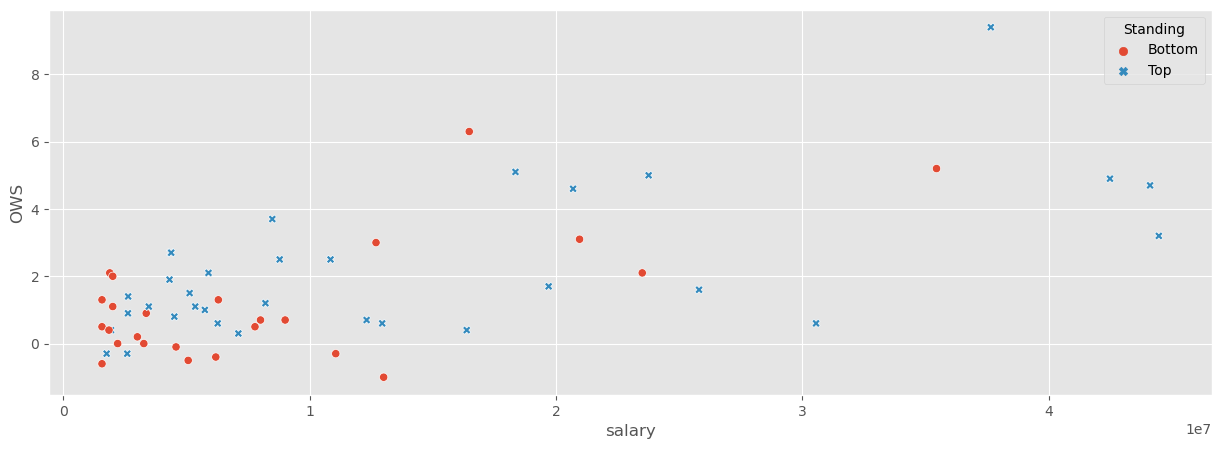

In [51]:
sns.scatterplot(data=PF_data_wSalary,x='salary',y='OWS',hue='Standing',style='Standing')

In [52]:
final_metrics=final[final['Decision']=='Reject']['Metrics']

In [59]:
final_metrics_list=[i for i in final_metrics]
final_metrics_list.append('Player')
final_metrics_list.append('salary_currentDollar')
final_metrics_list.append('Standing')
final_metrics_list

['eFG%',
 'TS%',
 'OWS',
 'DWS',
 'WS',
 'WS48',
 'DBPM',
 'BPM',
 'VORP',
 'Player',
 'salary_currentDollar',
 'Standing']

In [60]:
PF_final_metrics=PF_data_wSalary[final_metrics_list]
PF_final_metrics.head()

,eFG%,TS%,OWS,DWS,WS,WS48,DBPM,BPM,VORP,Player,salary_currentDollar,Standing
0,0.552,0.590,3.0,2.0,5.0,0.156,-0.8,-0.1,0.7,Chris Boucher,13066788,Bottom
1,0.515,0.565,5.2,2.6,7.8,0.141,-0.1,3.1,3.4,Pascal Siakam,36501206,Bottom
2,0.561,0.573,0.7,1.1,1.8,0.109,1.9,0.1,0.4,Thaddeus Young,8237534,Bottom
3,0.658,0.682,2.7,1.8,4.5,0.199,1.8,2.5,1.3,Brandon Clarke,4472897,Top
4,0.506,0.519,-0.3,1.4,1.1,0.043,-0.7,-3.9,-0.6,David Roddy,2665501,Top


In [61]:
weights={i:1/9 for i in final_metrics}

In [62]:
for stat in weights.keys():
    max_value = PF_final_metrics[stat].max()
    PF_final_metrics.loc[:, stat + '_norm'] = PF_final_metrics[stat] / max_value

PF_final_metrics.loc[:, 'Weighted_Score'] = sum([PF_final_metrics[stat + '_norm'] * weight for stat, weight in weights.items()])

# Rank players
ranked_PF = PF_final_metrics.sort_values('Weighted_Score', ascending=False)

# Display the top ranked players
print(ranked_PF[['Player', 'Weighted_Score','salary_currentDollar']])

                    Player  Weighted_Score  salary_currentDollar
5             Jimmy Butler        0.904961              38771293
12   Giannis Antetokounmpo        0.821356              43754169
23            Kevin Durant        0.672162              45429841
14             Evan Mobley        0.619509               8730468
30            LeBron James        0.566235              45795529
36           Julius Randle        0.559894              24465476
3           Brandon Clarke        0.547184               4472897
10           Kyle Anderson        0.543034               9041196
9          Lauri Markkanen        0.535737              16964639
1            Pascal Siakam        0.528294              36501206
25          Draymond Green        0.513003              26572707
31       Jarred Vanderbilt        0.494678               4503871
44            Aaron Gordon        0.487153              21305258
48         Cameron Johnson        0.428816               6062721
39        Robert Covingto

<Axes: xlabel='Weighted_Score', ylabel='salary_currentDollar'>

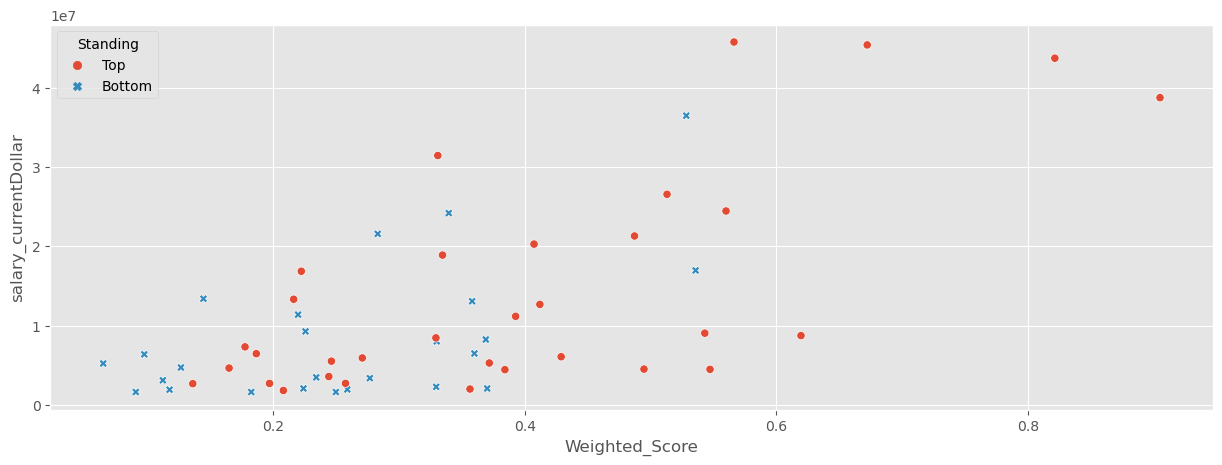

In [63]:
sns.scatterplot(data=ranked_PF,x='Weighted_Score',y='salary_currentDollar',hue='Standing',style='Standing')

In [58]:
# Assuming sg_key_stats is your DataFrame with players and their stats
#keyStats = ['Player_adv', 'PTS', 'TS%', '3P%', '3PA', '3P', '3PAr', 'AST', 'STL', 'DWS', 'PER', 'VORP', 'WS', 'USG%']
weights = {'PTS': 0.1, '3PAr': 0.2, 'TS%': 0.2, 'PER': 0.2, 'VORP': 0.2, 'WS': 0.2}

# Normalize the stats and calculate weighted score
for stat in weights.keys():
    max_value = sgKeyStats[stat].max()
    sgKeyStats.loc[:, stat + '_norm'] = sgKeyStats[stat] / max_value

sgKeyStats.loc[:, 'Weighted_Score'] = sum([sgKeyStats[stat + '_norm'] * weight for stat, weight in weights.items()])

# Rank players
ranked_sg = sgKeyStats.sort_values('Weighted_Score', ascending=False)

# Display the top ranked players
print(ranked_sg[['Player_adv', 'Weighted_Score']].head(25))


NameError: name 'sgKeyStats' is not defined